**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Skander SERSI

# Comment être un bon joueur

## Partie 1 - Description du problème

Nous cherchons à prédire si un joueur est bon ou pas, nous allons considérer qu'un bon joueur admet un overall supérieur à 70. Et cela, selon son poids et sa taille.

Nous allons pour cela utiliser le Bagging de Perceptron et faire varier le nombre d'arbres au début.

Puis nous allons faire regenerer un certains nombres de bases d'entrainement et de tests pour avoir une certaine variation d'accuracy.

Nous allons à la fin conclure à une accuracy moyenne et à un ecart type.

## Partie 2 - Modèle

Notre base d'apprentissage est un tirage au hasard d'un certain nombre de joueurs.
Notre base de test: le reste des joueurs.

## Partie 3 - Code

In [1]:
import pandas as pd
import numpy as np
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from numpy import linspace,hstack
from pylab import plot,show,hist
import matplotlib.pyplot as plt
import random
import warnings; 
%matplotlib inline

In [2]:
data_Player = pd.read_csv("projet/player.csv")

In [3]:
data_PA = pd.read_csv("projet/playerattributes.csv")

In [5]:
data_PA

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [4]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [5]:
class Classifier:
    def __init__(self,input_dimension):
        """ Constructeur """
        raise NotImplementedError("Please Implement this method")
    
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        raise NotImplementedError("Please Implement this method")

    
    # Permet d'entrainer le modele sur un ensemble de données étiquetés
    def train(self,labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    # Permet de calculer le taux de bonne classification
    def accuracy(self,setu):
        nb_ok=0
        for i in range(setu.size()):
            score = self.predict(setu.getX(i))
            if (score*setu.getY(i)>0):
                nb_ok = nb_ok+1
        acc = nb_ok/(setu.size() * 1.0)
        return acc


In [6]:
class Perceptron(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_it):
        self.input_dimension=input_dimension
        self.nombre_it=nombre_it
        self.w = np.random.rand(input_dimension)
        self.learning_rate=learning_rate
        
        
        
    def scinder (self, dataset, n):
        taille_coupe=int(dataset.size()*n)
        partie = LabeledSet(self.input_dimension)
        i=0
        while (i<taille_coupe):
            i=i+1
            partie.addExample(dataset.getX(i), dataset.getY(i))
            
        return partie
    
    def train (self,dataset):
        j=0
        i=0
        self.dataset=dataset
        sub=self.scinder(dataset,0.4)

        length=dataset.size()
        while (j<self.nombre_it):
            while (i<length):
                x=dataset.getX(i)
                predict=self.predict(dataset.getX(i))
                res=dataset.getY(i)
                if (predict!=res):
                    self.w=self.w+self.learning_rate*res*x
                i = i+1
            j = j+1
            
    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [56]:
# Fonction qui  qui étant donné un vecteur d'entiers VX  qui représente l'ensemble des indices des exemples d'une base d'apprentissage  X , un entier  m , et un booléen  r
# rend un vecteur de  m  indices choisis aléatoirement dans  VXVX . Si le booléen  rr  est vrai, le tirage s'effectue avec remise, sinon il s'effectue sans remise.

def tirage(vx,m,r):
    l = list()
    if r==True:
        for i in range(m):
            l.append(random.choice(vx))
    else:
            l = random.sample(vx,m)
    return l

# Fonction qui étant donné un LabeledSet X, un nombre entier m, et un booléen rend un échantillon de X de taille m sous la forme d'un LabeledSet.
#L'échantillon est obtenu par un tirage avec remise si le booléen est True, sinon, il est obtenu sans remise.
def echantillonLS(X,m,r):
    LS = LabeledSet(2)
    L= [i for i in range(0,X.size())]
    L_choisis = tirage(L,m,r)
    for i in L_choisis:
        LS.addExample(X.getX(i),X.getY(i))
    return LS

# Retourner un echantillons de m exemples d'un dataframe X
def echantillon_classes(X, m):
    liste_index = range(X.size())
    dataset = LabeledSet(X.getInputDimension())
    for c in [1, -1]:
        cpt = 0
        while cpt < m:
            i = tirage(liste_index, 1, True)[0]
            if X.getY(i) == c:
                cpt += 1
                dataset.addExample(X.getX(i), X.getY(i))
    return dataset

#Fontion nous donnant le labeledset X privé  de E
def set_prive(X, E):
    datasetF = LabeledSet(X.getInputDimension())
    for i in range(X.size()):
        #print(X.x)
        #print (E.x)
        if not (X.getX(i) in E.x):
            datasetF.addExample(X.getX(i), X.getY(i))
    return datasetF



In [8]:
class ClassifierBaggingPerceptron(Classifier):
    def __init__(self,input_dimension, nb_exemples, ratio, learning_rate, nombre_it,r):
        # valeur seuil d'entropie pour arrêter la construction
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate
        self.nombre_it= nombre_it
        self.nb_exemples=nb_exemples
        self.ratio=ratio
        self.r=r
        self.res = set()
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        nbp = 0
        nbm = 0
        for elt in self.res:
            
            if(elt.predict(x)) == 1:
                nbp += 1
            else:
                nbm += 1
        
        if nbp>=nbm:
            return 1
        else:
            return -1
            

    
    # Permet d'entrainer le modele sur un ensemble de données étiquetés
    def train(self,labeledSet):
        for i in range(self.nb_exemples):
            
            ad = Perceptron(self.input_dimension,self.learning_rate,self.nombre_it)
            ad.train(labeledSet)
            self.res.add(ad)
        return ad
    

In [54]:
# Fonction qui retourne si un joueur est bon ( label 1) ou pas (label -1)
def labeling_overall(df):
    
    if int(df)>= 70:
        return 1
    else:
        return -1

# retourne la taille et le poids d'un joueur selon l'id du joueur
def poids_taille(id):

    tmp = data_Player.loc[data_Player['player_api_id'] == id.values[0],['height','weight']]
    return [tmp.values[0][0],tmp.values[0][1]]

# Remplissage d'un labeledSet par un dataFrame
def remplissage_ls(dataframe):
    ls =  LabeledSet(2)
    #dataframe.head(-1)
    for i in dataframe.index:
        #print('tmp')
        tmp = dataframe.loc[dataframe.index == i]
        #print(tmp)
        pds = poids_taille(tmp['player_api_id'])
        label = labeling_overall(tmp['overall_rating'])
        
        ls.addExample(pds ,label)
    return ls

In [10]:
def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000],linewidth=2)

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o')
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x')


## Partie 4 - Protocole expérimental

In [11]:
data_PA = data_PA.drop_duplicates(subset = ['player_api_id'])
the_set = remplissage_ls(data_PA)

In [55]:
the_set.size()

11060

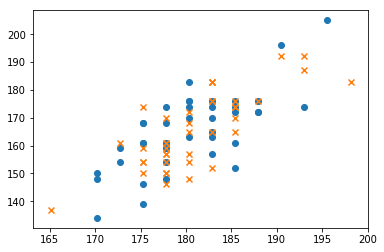

In [69]:
Eq = echantillon_classes(the_set, 40)
F = set_prive(the_set, Eq)
plot2DSet(Eq)

In [70]:
F.size()

72

In [71]:
foret = ClassifierBaggingPerceptron(2,150, 0.3, 0.0,180,True)
ad = foret.train(Eq)

In [72]:
foret.accuracy(F)

0.3472222222222222

## Partie 5 - Résultats

## Partie 6 - Analyse

In [73]:
#Learning rate fixé à 0.02, nb arbres variable
test_25 = ClassifierBaggingPerceptron(2,25, 0.3, 0.02,10,True)
test_50 = ClassifierBaggingPerceptron(2,50, 0.3, 0.02,10,True)
test_75 = ClassifierBaggingPerceptron(2,75, 0.3, 0.02,10,True)
test_100 = ClassifierBaggingPerceptron(2,100, 0.3, 0.02,10,True)
test_125 = ClassifierBaggingPerceptron(2,125, 0.3, 0.02,10,True)

test_25.train(Eq)
test_50.train(Eq)
test_75.train(Eq)
test_100.train(Eq)
test_125.train(Eq)


listAccuracy_test_perce_nbarbre = [test_25.accuracy(F), test_50.accuracy(F)
                      ,test_75.accuracy(F)
                      ,test_100.accuracy(F)
                      ,test_125.accuracy(F)]

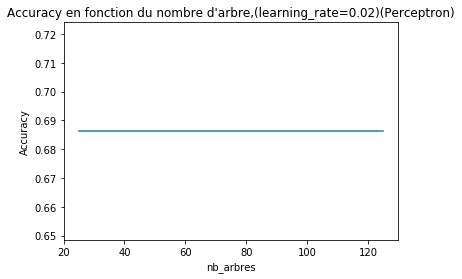

In [50]:
plt.title("Accuracy en fonction du nombre d'arbre,(learning_rate=0.02)(Perceptron)")
plt.plot([25,50,75,100,125],listAccuracy_test_perce_nbit)
plt.xlabel('nb_arbres')
plt.ylabel('Accuracy')
plt.show()

On remarque que l'accuracy ne varie pas selon le nombre d'arbres de la foret.

Nous allons donc varier les bases d'entrainement et les bases de tests et tracer les courbes d'accuracy correspondantes.

In [51]:
l = list()
for i in range(50):
    Eq = echantillon_classes(the_set, 10)
    F = set_prive(the_set, Eq)
    test = ClassifierBaggingPerceptron(2,25, 0.3, 0.02,10,True)
    test.train(Eq)
    l.append(test.accuracy(F))

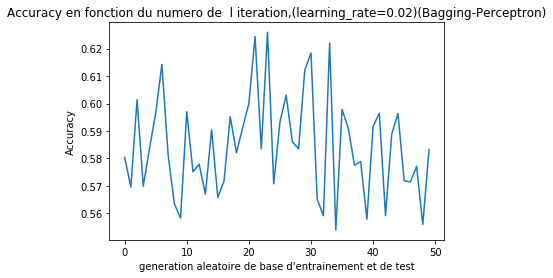

In [52]:
plt.title("Accuracy en fonction du numero de  l iteration,(learning_rate=0.02)(Bagging-Perceptron)")
plt.plot(range(50),l)
plt.xlabel('generation aleatoire de base d\'entrainement et de test')
plt.ylabel('Accuracy')
plt.show()

In [53]:
print('La moyenne ',np.mean(l))
print('Ecart type ',np.std(l))

La moyenne  0.584589691396
Ecart type  0.0183447097803


Sur 50 generation aleatoire de base d'entrainement et de test nous pouvons dire qu'en moyenne (sur 50 génération) on pourrait prédire le talent d'un joueur avec une accuracy de 0.58 avecun ecart type de 0.018.